# ✔︎ NIKE_SALES_DATASET ("main_project")
#### About:"This synthetic dataset simulates retail and online sales transactions from Nike, one of the world's leading sportswear and footwear brands".

#### AIM:" To analyze the Nike dataset to understand sales trends, customer preferences, and factors influencing product performance."


# 📌 feactures;
- Over 2,500 transaction records containing:

- Multiple product lines (Running, Basketball, Lifestyle, Training, Soccer)

- Gender-specific sales (Men, Women, Kids)

- Sales from both Retail Stores and Online Channels

 Common data issues like:

- Null values

- Typos in regions

- Wrong data types

- Negative values in numeric columns

- Inconsistent date formats (e.g., 2023/07/21, 21-07-2023, etc.)

- Discounts > 100%

# Columns Description


### Order_ID ----Transaction/order ID
### Gender_Category------- Buyer segment: Men, Women, or Kids
### Product_Line------ Product type: Running, Basketball, etc.
### Product_Name -------Specific product sold (e.g., Air Force 1, Pegasus Turbo)
### Size -----Product size
### Units_Sold-------- Quantity sold
### MRP---------- Maximum retail price
### Discount_Applied------ Discount applied on sale
### Revenue -------Final amount after discount 
### Order_Date --------Date of transaction
### Sales_Channel -----------Online or Retail
### Region -------------Indian cities (includes typos like "Delhii", "Banglore")
### Profit --------------Profit made

In [129]:
import pandas as pd
import numpy as np

In [130]:
df=pd.read_csv("Nike_Sales_Uncleaned.csv")
df

,Order_ID,Gender_Category,Product_Line,Product_Name,Size,Units_Sold,MRP,Discount_Applied,Revenue,Order_Date,Sales_Channel,Region,Profit
0,2000,Kids,Training,SuperRep Go,M,NaN,NaN,0.47,0.0,3/9/2024,Online,bengaluru,-770.45
1,2001,Women,Soccer,Tiempo Legend,M,3.0,4957.93,NaN,0.0,7/9/2024,Retail,Hyd,-112.53
2,2002,Women,Soccer,Premier III,M,4.0,NaN,NaN,0.0,NaN,Retail,Mumbai,3337.34
3,2003,Kids,Lifestyle,Blazer Mid,L,NaN,9673.57,NaN,0.0,4/10/2024,Online,Pune,3376.85
4,2004,Kids,Running,React Infinity,XL,NaN,NaN,NaN,0.0,9/12/2024,Retail,Delhi,187.89
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,4494,Women,Training,ZoomX Invincible,L,NaN,NaN,NaN,0.0,12/2/2025,Online,Kolkata,1357.29
2107,4495,Kids,Basketball,Kyrie Flytrap,XL,3.0,NaN,NaN,0.0,5/14/2025,Online,Pune,2.97
2108,4496,Men,Basketball,Kyrie Flytrap,L,-1.0,NaN,NaN,0.0,NaN,Online,Hyd,-487.36
2109,4497,Men,Soccer,Tiempo Legend,7,NaN,6647.60,0.52,0.0,2/7/2025,Retail,Bangalore,-918.14


##  ⚙ STAGE : Data Cleaning 

#### >>find null values in each colum'''

In [131]:

df.isnull().sum()

Order_ID               0
Gender_Category        0
Product_Line           0
Product_Name           0
Size                 425
Units_Sold          1065
MRP                 1059
Discount_Applied    1421
Revenue                0
Order_Date           616
Sales_Channel          0
Region                 0
Profit                 0
dtype: int64

In [132]:
df.dtypes

Order_ID              int64
Gender_Category      object
Product_Line         object
Product_Name         object
Size                 object
Units_Sold          float64
MRP                 float64
Discount_Applied    float64
Revenue             float64
Order_Date           object
Sales_Channel        object
Region               object
Profit              float64
dtype: object

In [133]:
df.head()


,Order_ID,Gender_Category,Product_Line,Product_Name,Size,Units_Sold,MRP,Discount_Applied,Revenue,Order_Date,Sales_Channel,Region,Profit
0,2000,Kids,Training,SuperRep Go,M,NaN,NaN,0.47,0.0,3/9/2024,Online,bengaluru,-770.45
1,2001,Women,Soccer,Tiempo Legend,M,3.0,4957.93,NaN,0.0,7/9/2024,Retail,Hyd,-112.53
2,2002,Women,Soccer,Premier III,M,4.0,NaN,NaN,0.0,NaN,Retail,Mumbai,3337.34
3,2003,Kids,Lifestyle,Blazer Mid,L,NaN,9673.57,NaN,0.0,4/10/2024,Online,Pune,3376.85
4,2004,Kids,Running,React Infinity,XL,NaN,NaN,NaN,0.0,9/12/2024,Retail,Delhi,187.89


In [134]:
df.tail()

,Order_ID,Gender_Category,Product_Line,Product_Name,Size,Units_Sold,MRP,Discount_Applied,Revenue,Order_Date,Sales_Channel,Region,Profit
2106,4494,Women,Training,ZoomX Invincible,L,NaN,NaN,NaN,0.0,12/2/2025,Online,Kolkata,1357.29
2107,4495,Kids,Basketball,Kyrie Flytrap,XL,3.0,NaN,NaN,0.0,5/14/2025,Online,Pune,2.97
2108,4496,Men,Basketball,Kyrie Flytrap,L,-1.0,NaN,NaN,0.0,NaN,Online,Hyd,-487.36
2109,4497,Men,Soccer,Tiempo Legend,7,NaN,6647.6,0.52,0.0,2/7/2025,Retail,Bangalore,-918.14
2110,4498,Women,Training,ZoomX Invincible,NaN,4.0,5358.7,NaN,0.0,11/12/2024,Online,Mumbai,3352.29


In [135]:
df.describe()

,Order_ID,Units_Sold,MRP,Discount_Applied,Revenue,Profit
count,2111.000000,1046.000000,1052.000000,690.000000,2111.000000,2111.000000
mean,3191.597347,1.453155,6104.681673,0.638058,246.996144,1391.350223
std,748.824597,1.697509,2313.121482,0.370006,1981.148706,1474.495516
min,2000.000000,-1.000000,2006.630000,0.000000,-7561.590000,-1199.320000
25%,2536.500000,0.000000,4096.252500,0.320000,0.000000,111.060000
50%,3192.000000,1.000000,6178.620000,0.630000,0.000000,1383.010000
75%,3831.000000,3.000000,8087.210000,0.980000,0.000000,2694.345000
max,4498.000000,4.000000,9996.220000,1.250000,37169.350000,3996.960000


In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Order_ID          2111 non-null   int64  
 1   Gender_Category   2111 non-null   object 
 2   Product_Line      2111 non-null   object 
 3   Product_Name      2111 non-null   object 
 4   Size              1686 non-null   object 
 5   Units_Sold        1046 non-null   float64
 6   MRP               1052 non-null   float64
 7   Discount_Applied  690 non-null    float64
 8   Revenue           2111 non-null   float64
 9   Order_Date        1495 non-null   object 
 10  Sales_Channel     2111 non-null   object 
 11  Region            2111 non-null   object 
 12  Profit            2111 non-null   float64
dtypes: float64(5), int64(1), object(7)
memory usage: 214.5+ KB


## ⚫CLEANING IN ORDER_ID COLUM

In [137]:
df= pd.DataFrame(df)

#syntax of find duplicates in order_id colum
# count_duplicates=df["Order_ID"].duplicated().sum()
# print(count_duplicates)

## remove duplicates in order_id colum
df.drop_duplicates(subset="Order_ID",inplace=True)
df

,Order_ID,Gender_Category,Product_Line,Product_Name,Size,Units_Sold,MRP,Discount_Applied,Revenue,Order_Date,Sales_Channel,Region,Profit
0,2000,Kids,Training,SuperRep Go,M,NaN,NaN,0.47,0.0,3/9/2024,Online,bengaluru,-770.45
1,2001,Women,Soccer,Tiempo Legend,M,3.0,4957.93,NaN,0.0,7/9/2024,Retail,Hyd,-112.53
2,2002,Women,Soccer,Premier III,M,4.0,NaN,NaN,0.0,NaN,Retail,Mumbai,3337.34
3,2003,Kids,Lifestyle,Blazer Mid,L,NaN,9673.57,NaN,0.0,4/10/2024,Online,Pune,3376.85
4,2004,Kids,Running,React Infinity,XL,NaN,NaN,NaN,0.0,9/12/2024,Retail,Delhi,187.89
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,4494,Women,Training,ZoomX Invincible,L,NaN,NaN,NaN,0.0,12/2/2025,Online,Kolkata,1357.29
2107,4495,Kids,Basketball,Kyrie Flytrap,XL,3.0,NaN,NaN,0.0,5/14/2025,Online,Pune,2.97
2108,4496,Men,Basketball,Kyrie Flytrap,L,-1.0,NaN,NaN,0.0,NaN,Online,Hyd,-487.36
2109,4497,Men,Soccer,Tiempo Legend,7,NaN,6647.60,0.52,0.0,2/7/2025,Retail,Bangalore,-918.14


## ⚫CLEANING IN SIZE COLUM

#### In Size colum replace to ( S , M ,L ,etc) based on size
#### use Replace function

#### >>FIND NUMBERS SIZE FOR REPLACE INTO WORD SIZE

In [138]:

unique= df["Size"].unique()
print("no of unique values in size colum:",unique)

df['Size'] = df['Size'].astype(str).str.strip()

new_size = {
    '8': 'M',
    '9': 'M',
    '6': 'S',
    '7': 'S',
    '10': 'L',
    '11': 'XL',
    '12': 'XL'
}

df['Size'] = df['Size'].replace(new_size)
df


no of unique values in size colum: ['M' 'L' 'XL' '11' '6' '12' nan '7' '10' '8' '9']


,Order_ID,Gender_Category,Product_Line,Product_Name,Size,Units_Sold,MRP,Discount_Applied,Revenue,Order_Date,Sales_Channel,Region,Profit
0,2000,Kids,Training,SuperRep Go,M,NaN,NaN,0.47,0.0,3/9/2024,Online,bengaluru,-770.45
1,2001,Women,Soccer,Tiempo Legend,M,3.0,4957.93,NaN,0.0,7/9/2024,Retail,Hyd,-112.53
2,2002,Women,Soccer,Premier III,M,4.0,NaN,NaN,0.0,NaN,Retail,Mumbai,3337.34
3,2003,Kids,Lifestyle,Blazer Mid,L,NaN,9673.57,NaN,0.0,4/10/2024,Online,Pune,3376.85
4,2004,Kids,Running,React Infinity,XL,NaN,NaN,NaN,0.0,9/12/2024,Retail,Delhi,187.89
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,4494,Women,Training,ZoomX Invincible,L,NaN,NaN,NaN,0.0,12/2/2025,Online,Kolkata,1357.29
2107,4495,Kids,Basketball,Kyrie Flytrap,XL,3.0,NaN,NaN,0.0,5/14/2025,Online,Pune,2.97
2108,4496,Men,Basketball,Kyrie Flytrap,L,-1.0,NaN,NaN,0.0,NaN,Online,Hyd,-487.36
2109,4497,Men,Soccer,Tiempo Legend,S,NaN,6647.60,0.52,0.0,2/7/2025,Retail,Bangalore,-918.14


#### >>DROP  NULL VALUES IN SIZE COLUM

In [139]:

df.dropna(subset='Size',inplace=True)


## ⚫CLEANING IN DISCOUNT COLUM
#### IN DISCOUNT_COLUM SOME VALUES ARE MORETHAN( 100% OR 1.00),SO SUCH VALUES ARE REPLACED WITH AVERAGE VALUES OF < 1.00 IN DISCOUNT COLUM
#### USE LOC[]



#### >>FIRST FIND WHICH ROWS IS MORE THAN 100% IN DISCOUNT COLUM

In [140]:


df[df["Discount_Applied"]>=1.00]


,Order_ID,Gender_Category,Product_Line,Product_Name,Size,Units_Sold,MRP,Discount_Applied,Revenue,Order_Date,Sales_Channel,Region,Profit
14,2018,Men,Training,Metcon 7,XL,0.0,NaN,1.17,0.00,NaN,Online,bengaluru,-966.89
24,2030,Men,Soccer,Phantom GT,XL,NaN,NaN,1.05,0.00,7/14/2025,Retail,Hyd,-122.93
26,2032,Women,Lifestyle,Blazer Mid,XL,1.0,NaN,1.07,0.00,11/4/2025,Retail,Mumbai,-555.16
28,2037,Kids,Running,Pegasus Turbo,S,3.0,5653.14,1.01,-169.59,NaN,Retail,Pune,2776.96
36,2046,Kids,Running,Air Zoom,XL,NaN,NaN,1.04,0.00,NaN,Online,Kolkata,1284.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2038,4420,Women,Lifestyle,Blazer Mid,L,4.0,4904.79,1.19,-3727.64,11/8/2023,Retail,Pune,2633.82
2059,4443,Men,Lifestyle,Dunk Low,M,3.0,7953.00,1.21,-5010.39,5/12/2025,Retail,Hyd,-665.22
2082,4468,Men,Soccer,Premier III,XL,3.0,6077.13,1.13,-2370.08,11/27/2023,Online,Mumbai,3173.31
2089,4475,Kids,Soccer,Tiempo Legend,M,NaN,NaN,1.25,0.00,3/4/2024,Online,Hyd,1487.03


#### >> FIND A MEAN OR AVERAGE VALUE OF DISCOUNT <100%

In [141]:

mean=df.loc[df['Discount_Applied']<1.00,'Discount_Applied'].mean()


df.loc[df['Discount_Applied']>1.00,'Discount_Applied']= mean

In [142]:
df[df["Discount_Applied"]>1.00]

,Order_ID,Gender_Category,Product_Line,Product_Name,Size,Units_Sold,MRP,Discount_Applied,Revenue,Order_Date,Sales_Channel,Region,Profit


#### >>FIND WHICH DATES THE DISCOUNT NOT ALLOWED,,,,

In [143]:
isnull= df["Discount_Applied"].isnull() 
df.loc[df["Discount_Applied"]== isnull,"Order_Date"]

1792    10/16/2023
1863    11/15/2024
1869     11/8/2024
1992      7/8/2025
Name: Order_Date, dtype: object

#### >>REPLACE NAN IN DISCOUNT COLUM TO "0"


In [144]:
df["Discount_Applied"]= df["Discount_Applied"].fillna(0)

In [145]:
df

,Order_ID,Gender_Category,Product_Line,Product_Name,Size,Units_Sold,MRP,Discount_Applied,Revenue,Order_Date,Sales_Channel,Region,Profit
0,2000,Kids,Training,SuperRep Go,M,NaN,NaN,0.47,0.0,3/9/2024,Online,bengaluru,-770.45
1,2001,Women,Soccer,Tiempo Legend,M,3.0,4957.93,0.00,0.0,7/9/2024,Retail,Hyd,-112.53
2,2002,Women,Soccer,Premier III,M,4.0,NaN,0.00,0.0,NaN,Retail,Mumbai,3337.34
3,2003,Kids,Lifestyle,Blazer Mid,L,NaN,9673.57,0.00,0.0,4/10/2024,Online,Pune,3376.85
4,2004,Kids,Running,React Infinity,XL,NaN,NaN,0.00,0.0,9/12/2024,Retail,Delhi,187.89
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,4494,Women,Training,ZoomX Invincible,L,NaN,NaN,0.00,0.0,12/2/2025,Online,Kolkata,1357.29
2107,4495,Kids,Basketball,Kyrie Flytrap,XL,3.0,NaN,0.00,0.0,5/14/2025,Online,Pune,2.97
2108,4496,Men,Basketball,Kyrie Flytrap,L,-1.0,NaN,0.00,0.0,NaN,Online,Hyd,-487.36
2109,4497,Men,Soccer,Tiempo Legend,S,NaN,6647.60,0.52,0.0,2/7/2025,Retail,Bangalore,-918.14


### Build a New Colum "Profit_Margin"

In [146]:
df

,Order_ID,Gender_Category,Product_Line,Product_Name,Size,Units_Sold,MRP,Discount_Applied,Revenue,Order_Date,Sales_Channel,Region,Profit
0,2000,Kids,Training,SuperRep Go,M,NaN,NaN,0.47,0.0,3/9/2024,Online,bengaluru,-770.45
1,2001,Women,Soccer,Tiempo Legend,M,3.0,4957.93,0.00,0.0,7/9/2024,Retail,Hyd,-112.53
2,2002,Women,Soccer,Premier III,M,4.0,NaN,0.00,0.0,NaN,Retail,Mumbai,3337.34
3,2003,Kids,Lifestyle,Blazer Mid,L,NaN,9673.57,0.00,0.0,4/10/2024,Online,Pune,3376.85
4,2004,Kids,Running,React Infinity,XL,NaN,NaN,0.00,0.0,9/12/2024,Retail,Delhi,187.89
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,4494,Women,Training,ZoomX Invincible,L,NaN,NaN,0.00,0.0,12/2/2025,Online,Kolkata,1357.29
2107,4495,Kids,Basketball,Kyrie Flytrap,XL,3.0,NaN,0.00,0.0,5/14/2025,Online,Pune,2.97
2108,4496,Men,Basketball,Kyrie Flytrap,L,-1.0,NaN,0.00,0.0,NaN,Online,Hyd,-487.36
2109,4497,Men,Soccer,Tiempo Legend,S,NaN,6647.60,0.52,0.0,2/7/2025,Retail,Bangalore,-918.14


## ⚫ CLEANING IN MRP COLUM

In [147]:
df["Product_Line"].unique()

array(['Training', 'Soccer', 'Lifestyle', 'Running', 'Basketball'],
      dtype=object)

#### >>find mean of MRP based on each Product_Category------------------------------------

In [148]:



t_value= df.loc[df['Product_Line']=="Training","MRP"].mean()
b_value= df.loc[df['Product_Line']=="Basketball","MRP"].mean()
s_value= df.loc[df['Product_Line']=="Soccer","MRP"].mean()
l_value= df.loc[df['Product_Line']=="Lifestyle","MRP"].mean()
r_value= df.loc[df['Product_Line']=="Running","MRP"].mean()
print('Average of Training:',t_value)  
print('Average of Basketball:',b_value) 
print('Average of Soccer:',s_value) 
print('Average of Lifestyle:',l_value) 
print('Average of Running:',r_value) 

Average of Training: 6106.400950226243
Average of Basketball: 6103.314536082475
Average of Soccer: 6048.786145251396
Average of Lifestyle: 6136.936409090909
Average of Running: 6106.765364583334


#### >>FILL NAN IN MRP COLUM WITH AVERAGE--USE-->{for loop & if function}

In [149]:


unq=df['Product_Line'].unique() 

In [150]:
                                          
 for fill in unq :
     mean= df.loc[df["Product_Line"]==fill,"MRP"].mean()                         
     df.loc[(df["Product_Line"]==fill) & (df["MRP"].isnull()),"MRP"]= mean
    
    
    

In [151]:


df["MRP"]=df["MRP"].round()

#### >>FILL NAN IN MRP COLUM WITH AVERAGE===> ALSO USE---> LOC[]----

In [152]:
# df.loc[(df["Product_Line"]=="Training") & (df["MRP"].isnull()),"MRP"]=t_value
# df.loc[(df['Product_Line']=="Basketball") &(df["MRP"].isnull()),"MRP"]=b_value
# df.loc[(df["Product_Line" ]=="Soccer") & (df["MRP"].isnull()),"MRP"]=s_value
# df.loc[(df["Product_Line" ]=="Lifestyle")& (df["MRP"].isnull()),"MRP"]=l_value
# df.loc[(df["Product_Line" ]=="Running") & (df["MRP"].isnull()),"MRP" ]=r_value

   

In [153]:
df.isnull().sum()

Order_ID               0
Gender_Category        0
Product_Line           0
Product_Name           0
Size                   0
Units_Sold          1018
MRP                    0
Discount_Applied       0
Revenue                0
Order_Date           585
Sales_Channel          0
Region                 0
Profit                 0
dtype: int64

In [154]:
df

,Order_ID,Gender_Category,Product_Line,Product_Name,Size,Units_Sold,MRP,Discount_Applied,Revenue,Order_Date,Sales_Channel,Region,Profit
0,2000,Kids,Training,SuperRep Go,M,NaN,6106.0,0.47,0.0,3/9/2024,Online,bengaluru,-770.45
1,2001,Women,Soccer,Tiempo Legend,M,3.0,4958.0,0.00,0.0,7/9/2024,Retail,Hyd,-112.53
2,2002,Women,Soccer,Premier III,M,4.0,6049.0,0.00,0.0,NaN,Retail,Mumbai,3337.34
3,2003,Kids,Lifestyle,Blazer Mid,L,NaN,9674.0,0.00,0.0,4/10/2024,Online,Pune,3376.85
4,2004,Kids,Running,React Infinity,XL,NaN,6107.0,0.00,0.0,9/12/2024,Retail,Delhi,187.89
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,4494,Women,Training,ZoomX Invincible,L,NaN,6106.0,0.00,0.0,12/2/2025,Online,Kolkata,1357.29
2107,4495,Kids,Basketball,Kyrie Flytrap,XL,3.0,6103.0,0.00,0.0,5/14/2025,Online,Pune,2.97
2108,4496,Men,Basketball,Kyrie Flytrap,L,-1.0,6103.0,0.00,0.0,NaN,Online,Hyd,-487.36
2109,4497,Men,Soccer,Tiempo Legend,S,NaN,6648.0,0.52,0.0,2/7/2025,Retail,Bangalore,-918.14


## ⚫ DATA CLEANING IN --->UNITS_COLUMN

#### >>FILL NAN & lessthan 0, WITH MEDIAN VALUE 

In [155]:
med_unit= df["Units_Sold"].median() 
df["Units_Sold"]=df["Units_Sold"].fillna(med_unit)

In [156]:
df.loc[df["Units_Sold"]<=0,"Units_Sold"]=med_unit

In [157]:
df

,Order_ID,Gender_Category,Product_Line,Product_Name,Size,Units_Sold,MRP,Discount_Applied,Revenue,Order_Date,Sales_Channel,Region,Profit
0,2000,Kids,Training,SuperRep Go,M,1.0,6106.0,0.47,0.0,3/9/2024,Online,bengaluru,-770.45
1,2001,Women,Soccer,Tiempo Legend,M,3.0,4958.0,0.00,0.0,7/9/2024,Retail,Hyd,-112.53
2,2002,Women,Soccer,Premier III,M,4.0,6049.0,0.00,0.0,NaN,Retail,Mumbai,3337.34
3,2003,Kids,Lifestyle,Blazer Mid,L,1.0,9674.0,0.00,0.0,4/10/2024,Online,Pune,3376.85
4,2004,Kids,Running,React Infinity,XL,1.0,6107.0,0.00,0.0,9/12/2024,Retail,Delhi,187.89
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,4494,Women,Training,ZoomX Invincible,L,1.0,6106.0,0.00,0.0,12/2/2025,Online,Kolkata,1357.29
2107,4495,Kids,Basketball,Kyrie Flytrap,XL,3.0,6103.0,0.00,0.0,5/14/2025,Online,Pune,2.97
2108,4496,Men,Basketball,Kyrie Flytrap,L,1.0,6103.0,0.00,0.0,NaN,Online,Hyd,-487.36
2109,4497,Men,Soccer,Tiempo Legend,S,1.0,6648.0,0.52,0.0,2/7/2025,Retail,Bangalore,-918.14


In [158]:
df.isnull().sum() 

Order_ID              0
Gender_Category       0
Product_Line          0
Product_Name          0
Size                  0
Units_Sold            0
MRP                   0
Discount_Applied      0
Revenue               0
Order_Date          585
Sales_Channel         0
Region                0
Profit                0
dtype: int64

## ⚫DATA CLEANING IN ORDER_DATE COLUM;;;


#### >>Drop Null Value in Order_Date Colum

In [159]:
df.dropna(subset="Order_Date",inplace=True) 

In [160]:
df

,Order_ID,Gender_Category,Product_Line,Product_Name,Size,Units_Sold,MRP,Discount_Applied,Revenue,Order_Date,Sales_Channel,Region,Profit
0,2000,Kids,Training,SuperRep Go,M,1.0,6106.0,0.47,0.0,3/9/2024,Online,bengaluru,-770.45
1,2001,Women,Soccer,Tiempo Legend,M,3.0,4958.0,0.00,0.0,7/9/2024,Retail,Hyd,-112.53
3,2003,Kids,Lifestyle,Blazer Mid,L,1.0,9674.0,0.00,0.0,4/10/2024,Online,Pune,3376.85
4,2004,Kids,Running,React Infinity,XL,1.0,6107.0,0.00,0.0,9/12/2024,Retail,Delhi,187.89
6,2006,Men,Training,SuperRep Go,M,1.0,6820.0,0.00,0.0,4/6/2025,Online,Bangalore,1802.09
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2105,4493,Women,Lifestyle,Blazer Mid,XL,4.0,6137.0,0.00,0.0,10/4/2024,Online,Mumbai,321.24
2106,4494,Women,Training,ZoomX Invincible,L,1.0,6106.0,0.00,0.0,12/2/2025,Online,Kolkata,1357.29
2107,4495,Kids,Basketball,Kyrie Flytrap,XL,3.0,6103.0,0.00,0.0,5/14/2025,Online,Pune,2.97
2109,4497,Men,Soccer,Tiempo Legend,S,1.0,6648.0,0.52,0.0,2/7/2025,Retail,Bangalore,-918.14


#### >>CONVERT DATE TYPE IN OBJECT TO DATETIME TYPE FOR BETTER ANALYSIS

In [161]:
df["Order_Date"] = pd.to_datetime(df["Order_Date"]) 

In [162]:
df.head(60)

,Order_ID,Gender_Category,Product_Line,Product_Name,Size,Units_Sold,MRP,Discount_Applied,Revenue,Order_Date,Sales_Channel,Region,Profit
0,2000,Kids,Training,SuperRep Go,M,1.0,6106.0,0.470000,0.00,2024-03-09,Online,bengaluru,-770.45
1,2001,Women,Soccer,Tiempo Legend,M,3.0,4958.0,0.000000,0.00,2024-07-09,Retail,Hyd,-112.53
3,2003,Kids,Lifestyle,Blazer Mid,L,1.0,9674.0,0.000000,0.00,2024-04-10,Online,Pune,3376.85
4,2004,Kids,Running,React Infinity,XL,1.0,6107.0,0.000000,0.00,2024-09-12,Retail,Delhi,187.89
6,2006,Men,Training,SuperRep Go,M,1.0,6820.0,0.000000,0.00,2025-04-06,Online,Bangalore,1802.09
8,2008,Women,Soccer,Premier III,XL,1.0,6049.0,0.000000,0.00,2024-11-10,Online,Hyderabad,-731.18
10,2010,Kids,Lifestyle,Waffle One,L,1.0,7950.0,0.000000,0.00,2025-01-16,Online,Pune,1965.56
12,2014,Women,Running,React Infinity,XL,1.0,6107.0,0.000000,0.00,2025-04-12,Online,Bangalore,-1044.40
15,2019,Kids,Running,Air Zoom,S,1.0,3424.0,0.320000,0.00,2025-01-17,Online,Hyderabad,1915.24
16,2021,Men,Running,Free RN,L,1.0,7087.0,0.660000,-2409.48,2024-11-19,Retail,Hyd,-1120.49


In [163]:
df.isnull().sum()

Order_ID            0
Gender_Category     0
Product_Line        0
Product_Name        0
Size                0
Units_Sold          0
MRP                 0
Discount_Applied    0
Revenue             0
Order_Date          0
Sales_Channel       0
Region              0
Profit              0
dtype: int64

In [164]:

df.dtypes

Order_ID                     int64
Gender_Category             object
Product_Line                object
Product_Name                object
Size                        object
Units_Sold                 float64
MRP                        float64
Discount_Applied           float64
Revenue                    float64
Order_Date          datetime64[ns]
Sales_Channel               object
Region                      object
Profit                     float64
dtype: object

## ⚫CLEANING IN PROFIT COLUM

#### >>REMOVE NEGATIVE USE ABS

In [165]:
df["Profit"]= df["Profit"].abs()

In [166]:
df.head(20)

,Order_ID,Gender_Category,Product_Line,Product_Name,Size,Units_Sold,MRP,Discount_Applied,Revenue,Order_Date,Sales_Channel,Region,Profit
0,2000,Kids,Training,SuperRep Go,M,1.0,6106.0,0.470000,0.00,2024-03-09,Online,bengaluru,770.45
1,2001,Women,Soccer,Tiempo Legend,M,3.0,4958.0,0.000000,0.00,2024-07-09,Retail,Hyd,112.53
3,2003,Kids,Lifestyle,Blazer Mid,L,1.0,9674.0,0.000000,0.00,2024-04-10,Online,Pune,3376.85
4,2004,Kids,Running,React Infinity,XL,1.0,6107.0,0.000000,0.00,2024-09-12,Retail,Delhi,187.89
6,2006,Men,Training,SuperRep Go,M,1.0,6820.0,0.000000,0.00,2025-04-06,Online,Bangalore,1802.09
8,2008,Women,Soccer,Premier III,XL,1.0,6049.0,0.000000,0.00,2024-11-10,Online,Hyderabad,731.18
10,2010,Kids,Lifestyle,Waffle One,L,1.0,7950.0,0.000000,0.00,2025-01-16,Online,Pune,1965.56
12,2014,Women,Running,React Infinity,XL,1.0,6107.0,0.000000,0.00,2025-04-12,Online,Bangalore,1044.40
15,2019,Kids,Running,Air Zoom,S,1.0,3424.0,0.320000,0.00,2025-01-17,Online,Hyderabad,1915.24
16,2021,Men,Running,Free RN,L,1.0,7087.0,0.660000,-2409.48,2024-11-19,Retail,Hyd,1120.49


#### >>derive a new colum & re-calculate the miscalculated revanue---

In [167]:
## first drop exiting revenue colum
df.drop("Revenue" ,axis=1,inplace=True) 

In [168]:

## create a new colum of selling price and revanue after discount
df["Selling_Price"]= df["Units_Sold"] * df["MRP"] 
df["Revanue"]=df["Units_Sold"] * df["MRP"] * (1-df["Discount_Applied"]) 

In [169]:
df.head(60)

,Order_ID,Gender_Category,Product_Line,Product_Name,Size,Units_Sold,MRP,Discount_Applied,Order_Date,Sales_Channel,Region,Profit,Selling_Price,Revanue
0,2000,Kids,Training,SuperRep Go,M,1.0,6106.0,0.470000,2024-03-09,Online,bengaluru,770.45,6106.0,3236.18000
1,2001,Women,Soccer,Tiempo Legend,M,3.0,4958.0,0.000000,2024-07-09,Retail,Hyd,112.53,14874.0,14874.00000
3,2003,Kids,Lifestyle,Blazer Mid,L,1.0,9674.0,0.000000,2024-04-10,Online,Pune,3376.85,9674.0,9674.00000
4,2004,Kids,Running,React Infinity,XL,1.0,6107.0,0.000000,2024-09-12,Retail,Delhi,187.89,6107.0,6107.00000
6,2006,Men,Training,SuperRep Go,M,1.0,6820.0,0.000000,2025-04-06,Online,Bangalore,1802.09,6820.0,6820.00000
8,2008,Women,Soccer,Premier III,XL,1.0,6049.0,0.000000,2024-11-10,Online,Hyderabad,731.18,6049.0,6049.00000
10,2010,Kids,Lifestyle,Waffle One,L,1.0,7950.0,0.000000,2025-01-16,Online,Pune,1965.56,7950.0,7950.00000
12,2014,Women,Running,React Infinity,XL,1.0,6107.0,0.000000,2025-04-12,Online,Bangalore,1044.40,6107.0,6107.00000
15,2019,Kids,Running,Air Zoom,S,1.0,3424.0,0.320000,2025-01-17,Online,Hyderabad,1915.24,3424.0,2328.32000
16,2021,Men,Running,Free RN,L,1.0,7087.0,0.660000,2024-11-19,Retail,Hyd,1120.49,7087.0,2409.58000


In [170]:
## repositioning Revenue colum

Revanue=df.pop("Revanue")
df.insert(9,"Revenue", Revanue)

In [171]:
##repositioning  Selling_Price colum

Selling_price = df.pop("Selling_Price")
df.insert(8,"Selling_Price",Selling_price) 


In [172]:
df

,Order_ID,Gender_Category,Product_Line,Product_Name,Size,Units_Sold,MRP,Discount_Applied,Selling_Price,Order_Date,Revenue,Sales_Channel,Region,Profit
0,2000,Kids,Training,SuperRep Go,M,1.0,6106.0,0.47,6106.0,2024-03-09,3236.18,Online,bengaluru,770.45
1,2001,Women,Soccer,Tiempo Legend,M,3.0,4958.0,0.00,14874.0,2024-07-09,14874.00,Retail,Hyd,112.53
3,2003,Kids,Lifestyle,Blazer Mid,L,1.0,9674.0,0.00,9674.0,2024-04-10,9674.00,Online,Pune,3376.85
4,2004,Kids,Running,React Infinity,XL,1.0,6107.0,0.00,6107.0,2024-09-12,6107.00,Retail,Delhi,187.89
6,2006,Men,Training,SuperRep Go,M,1.0,6820.0,0.00,6820.0,2025-04-06,6820.00,Online,Bangalore,1802.09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2105,4493,Women,Lifestyle,Blazer Mid,XL,4.0,6137.0,0.00,24548.0,2024-10-04,24548.00,Online,Mumbai,321.24
2106,4494,Women,Training,ZoomX Invincible,L,1.0,6106.0,0.00,6106.0,2025-12-02,6106.00,Online,Kolkata,1357.29
2107,4495,Kids,Basketball,Kyrie Flytrap,XL,3.0,6103.0,0.00,18309.0,2025-05-14,18309.00,Online,Pune,2.97
2109,4497,Men,Soccer,Tiempo Legend,S,1.0,6648.0,0.52,6648.0,2025-02-07,3191.04,Retail,Bangalore,918.14


## Cleaning In Region Colum

In [173]:
df['Region']= df['Region'].replace({'bengaluru':'Bangalore',
                      'Hyd':"Hyderabad",
                      'hyderbad':'Hyderabad'})
df

,Order_ID,Gender_Category,Product_Line,Product_Name,Size,Units_Sold,MRP,Discount_Applied,Selling_Price,Order_Date,Revenue,Sales_Channel,Region,Profit
0,2000,Kids,Training,SuperRep Go,M,1.0,6106.0,0.47,6106.0,2024-03-09,3236.18,Online,Bangalore,770.45
1,2001,Women,Soccer,Tiempo Legend,M,3.0,4958.0,0.00,14874.0,2024-07-09,14874.00,Retail,Hyderabad,112.53
3,2003,Kids,Lifestyle,Blazer Mid,L,1.0,9674.0,0.00,9674.0,2024-04-10,9674.00,Online,Pune,3376.85
4,2004,Kids,Running,React Infinity,XL,1.0,6107.0,0.00,6107.0,2024-09-12,6107.00,Retail,Delhi,187.89
6,2006,Men,Training,SuperRep Go,M,1.0,6820.0,0.00,6820.0,2025-04-06,6820.00,Online,Bangalore,1802.09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2105,4493,Women,Lifestyle,Blazer Mid,XL,4.0,6137.0,0.00,24548.0,2024-10-04,24548.00,Online,Mumbai,321.24
2106,4494,Women,Training,ZoomX Invincible,L,1.0,6106.0,0.00,6106.0,2025-12-02,6106.00,Online,Kolkata,1357.29
2107,4495,Kids,Basketball,Kyrie Flytrap,XL,3.0,6103.0,0.00,18309.0,2025-05-14,18309.00,Online,Pune,2.97
2109,4497,Men,Soccer,Tiempo Legend,S,1.0,6648.0,0.52,6648.0,2025-02-07,3191.04,Retail,Bangalore,918.14


##  🔍 STAGE :EXPLORATORY ANALYSIS IN THE YEAR OF 2025////

In [174]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib_inline

### RELATION B/W GENDER & PRODUCT NAME

#### Analyse Gender Wise Count Of Purchase :-

In [175]:
df1= df[df["Order_Date"].dt.year==2025]
df1.groupby(['Product_Name', 'Gender_Category']).size() 

Product_Name        Gender_Category
Air Force 1         Kids                8
                    Men                12
                    Women              12
Air Jordan          Kids               10
                    Men                15
                    Women              11
Air Zoom            Kids                7
                    Men                 8
                    Women              12
Blazer Mid          Kids               16
                    Men                11
                    Women               8
Dunk Low            Kids               13
                    Men                 9
                    Women               7
Flex Trainer        Kids               16
                    Men                11
                    Women              10
Free RN             Kids               13
                    Men                 7
                    Women              12
Kyrie Flytrap       Kids               10
                    Men                 

#### Top 5 PRODUCT in 2025 BY Profit--------<>


## 🔹Bivariate Analysis

Product_Name
Free RN               72622.90
SuperRep Go           64305.85
LeBron 20             62563.00
Waffle One            58610.73
Premier III           53794.31
Air Force 1           52695.68
Mercurial Superfly    52629.80
React Infinity        52334.39
Pegasus Turbo         51594.05
Blazer Mid            50888.05
Name: Profit, dtype: float64


Text(0, 0.5, 'Profit')

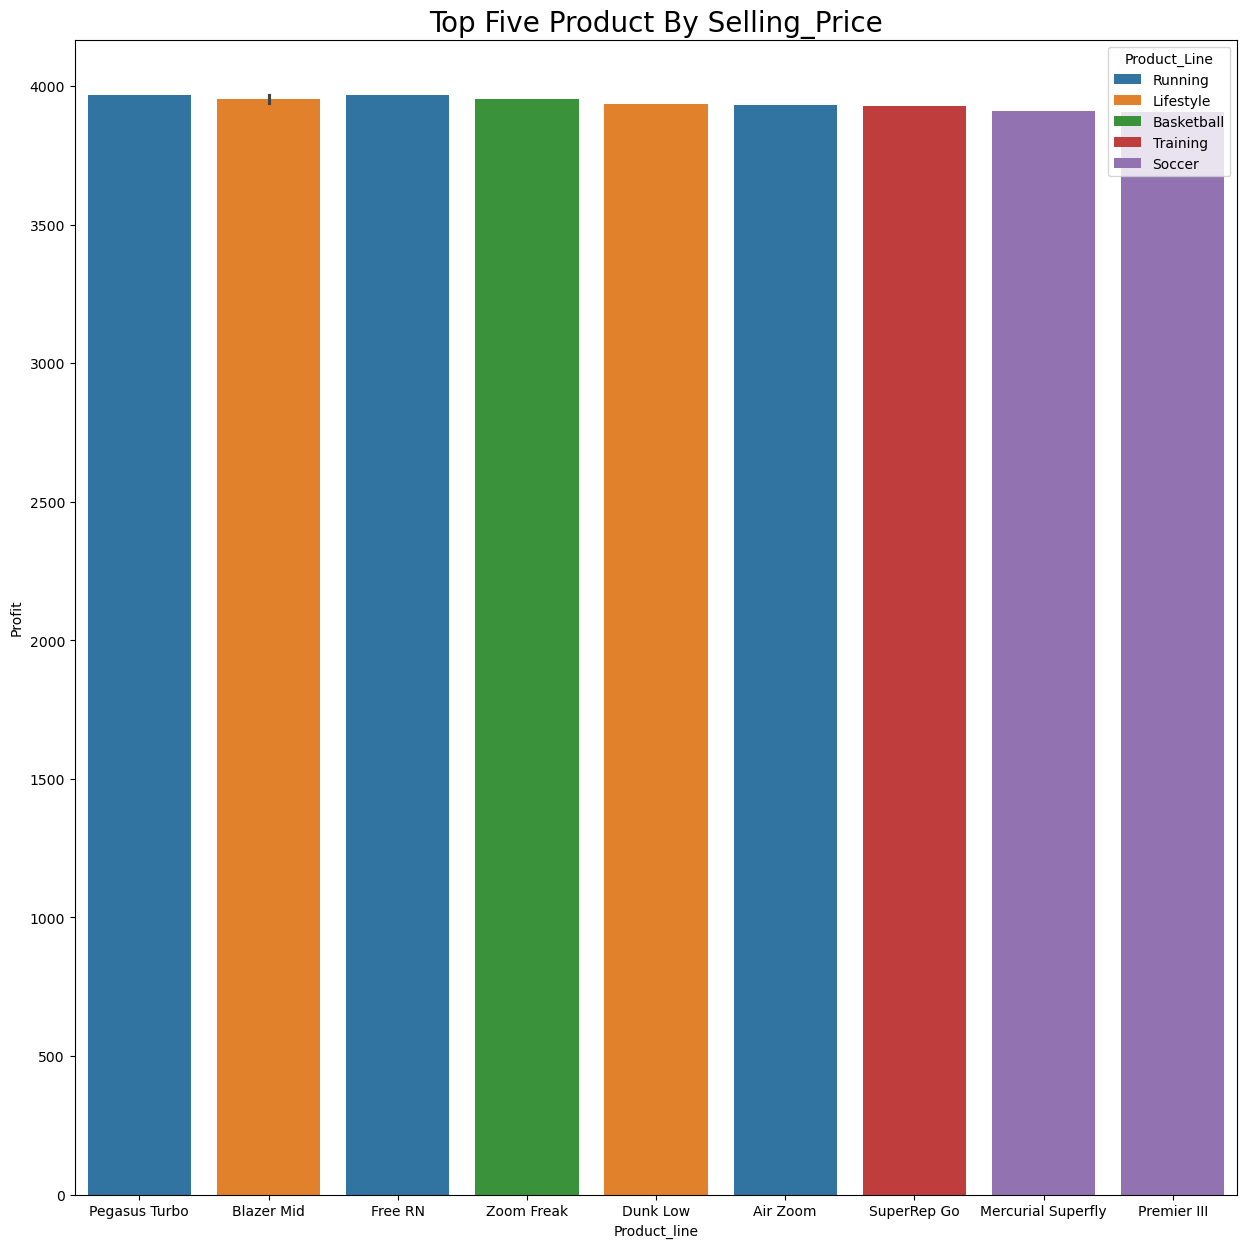

In [176]:

lr = df1.nlargest(10,'Profit')
pp=df1.groupby("Product_Name")["Profit"].sum().sort_values(ascending= False).head(10)
print(pp)
plt.figure(figsize=(15,15))
sns.barplot(x="Product_Name",y="Profit",data=lr,hue="Product_Line")

plt.title("Top Five Product By Selling_Price",size=20)
plt.tight_layout

plt.xlabel("Product_line") 

plt.ylabel("Profit")

GOAL: FIND BEST LEADING PRODUCT BY PROFIT

TYPE:  BIVARIATE

CHART: BAR PLOT

YEAR: 2025

## INSIGHTS 
- IN BAR CHART WHICH PRODUCTS IS STRONGLY LEADING IS CANNOT PROPERLY IDENTIFY
- ALL PRODUCTS ARE PERFORMING ALMOST SAME WAY
- PEGASUS TURBO & FREE RN IS COMPARETIVLY PERFORMING  WELL  UNDER RUNNING RUNNIG PRODUCT_LINE

## relation b/w sales_channel & product_line with profit

## 🔹Bivariate Analysis

Sales_Channel  Product_Line
Online         Running         128381.65
Retail         Lifestyle       123821.82
Online         Basketball      115718.00
Retail         Training        111034.68
               Soccer          100123.84
               Running          96745.25
Online         Soccer           93267.14
Retail         Basketball       90408.76
Online         Lifestyle        86180.45
               Training         83209.06
Name: Profit, dtype: float64


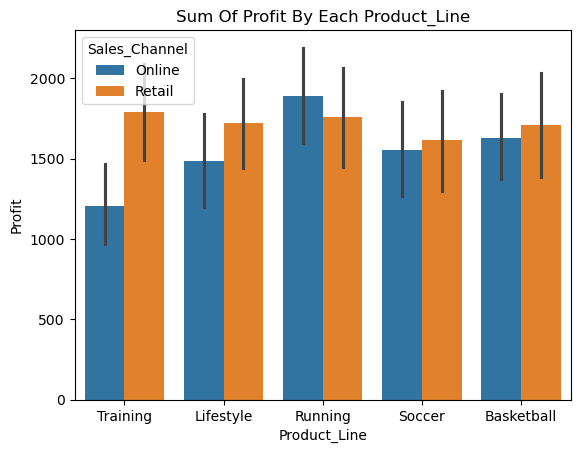

In [205]:
GRP=df1.groupby(["Sales_Channel","Product_Line"])["Profit"].sum().sort_values(ascending=False)
print(GRP)
sns.barplot(x='Product_Line',y='Profit', hue='Sales_Channel',data=df1)
plt.title("Sum Of Profit By Each Product_Line")
plt.tight_layout
plt.show()

GOAL:FIND MARKET TYPE  OF EACH PRODUCT LINE AND THEIR PERFORMANCE

TYPE: BAR PLOT

CHART: BIVARIATE

YEAR: 2025

## INSIGHTS
- Both Online & Retail Channels Show Strong Profit Level.
- In Online  'Running' Product_Line Get More Profit & In Retail 'LifeStyle' Product_Line Get More Profit.
- High Profit Are Earned Through Online Marketing.
- Each Product Have Same Demand On Reatil & Online.

### Profit Sequence in 2024 to 2025

## 🔹 Univariate Analysis

Groupby Date Based on Profit
Order_Month
2023-07     11955.99
2023-08     51737.01
2023-09     36779.14
2023-10     19101.16
2023-11     57283.86
2023-12     20367.94
2024-01     65026.85
2024-02     50957.83
2024-03     62240.28
2024-04     28647.19
2024-05     57170.05
2024-06     52707.26
2024-07     82136.20
2024-08    135717.95
2024-09    134094.44
2024-10    153828.58
2024-11    142672.07
2024-12    166863.00
2025-01    154427.45
2025-02    123285.97
2025-03    142898.72
2025-04    149922.00
2025-05    152144.40
2025-06    110616.81
2025-07     83806.34
2025-08     26516.96
2025-09     24775.01
2025-10     10433.92
2025-11     31319.77
2025-12     18743.30
Freq: M, Name: Profit, dtype: float64


<function matplotlib.pyplot.tight_layout(*, pad: 'float' = 1.08, h_pad: 'float | None' = None, w_pad: 'float | None' = None, rect: 'tuple[float, float, float, float] | None' = None) -> 'None'>

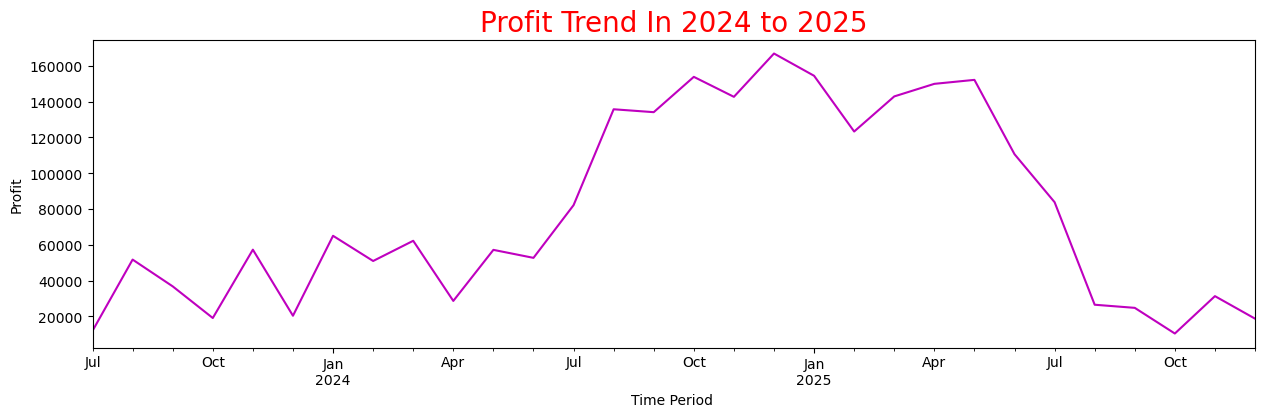

In [178]:
## CONVERT ORDER DATE IN TO MONTH PERIOD
df['Order_Month']=df['Order_Date'].dt.to_period('M')


Month_Pd=df.groupby('Order_Month')['Profit'].sum()

print("Groupby Date Based on Profit")
print("============================")
print(Month_Pd)

plt.figure(figsize=(15,4))

Month_Pd.plot(x='Order_Month',y='Profit',color='m')

plt.title("Profit Trend In 2024 to 2025",size=20,color="r")
plt.xlabel("Time Period ")
plt.ylabel("Profit")
plt.tight_layout

GOAL: ANALYSE AND FIND WHICH MONTH ATCHIEVE MORE PROFIT IN 2025

TYPE: UNIVARIATE

CHART: TIME SERIES ANALYSIS

YEAR: 2025

## INSIGHTS

- Each Year Display Repeated Ups and Downs
- This indicates that customer purchases are seasonal,Sales Increase During : Festival ,Year End Sale, New Collection Launches.
- Profit peaked during 2024/july to 2025/july
- Profit Increase in" jan,apr,jul,oct,"etc due to Holidays or Stock Replace

#### Histogram Analysis For Find Frequency of Size :-

## 🔹 Univariate Analysis

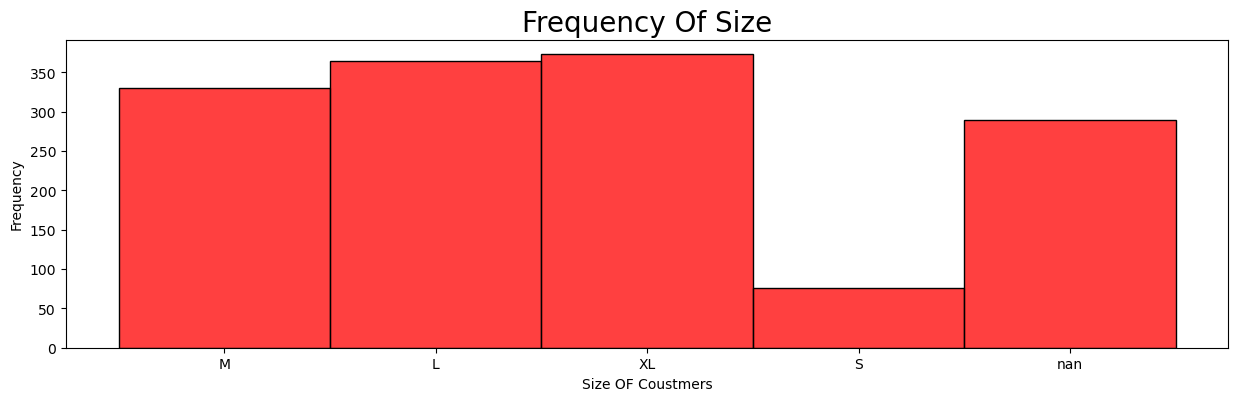

In [179]:

plt.figure(figsize=(15,4))

sns.histplot(df["Size"],color="r")

plt.title("Frequency Of Size",size=20)

plt.xlabel("Size OF Coustmers")

plt.ylabel("Frequency")

plt.tight_layout

plt.show()

GOAL: ANALYSIS AND FIND WHICH SIZE OF COUSTMERS IS MORE SALED.

TYPE: UNIVARIATE

CHART: HISTOGRAM

YEAR: 2025

## INSIGHTS
- Most Product Are Saled In Size XL ,With in (300 to 400)
- Average Age of XL IN footwear "8 to 12" Years &  CM:(18cm to 20cm ).
- Low Sales Are Occured in Size Of "S". & CM: (12cm to 14cm).
- 3 to 5 Years Child have frequency of purchase in (300 to 350)
  


#### Displot Analysis For Find Distribution of Product_line :-

## 🔹 Univariate Analysis

Text(0.5, 1.0, 'Distribution Of Each product_line')

<Figure size 1500x400 with 0 Axes>

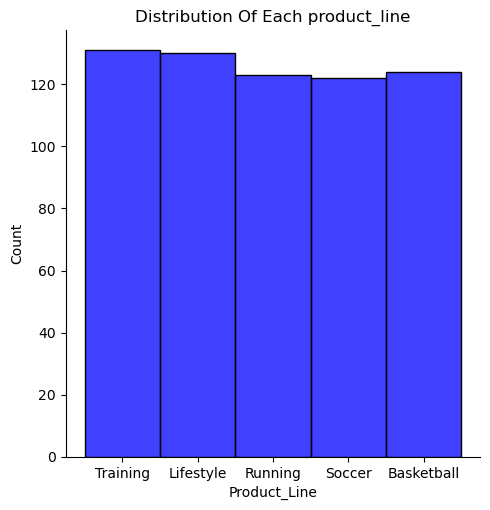

In [180]:

plt.figure(figsize=(15,4))
sns.displot(df1["Product_Line"],color="b")

plt.title("Distribution Of Each product_line" )

GOAL: ANALYSE AND FIND DEMAND OF EACH PRODUCT_LINE AND FIND BEST DEMANDED PRODUCT_LINE.

TYPE: UNIVARIATE

CHART: DIS PLOT

YEAR: 2025

## INSIGHTS
- In Product line Most Saled Product-Line Is Training Within (120 to 150)
- The second most Saled Product_Line  is lifestyle with in (120 to 150)
- Other Product Like Running ,Soccer,Basketball is Also Saled Countunisly Along With Other Peak Product_line with in range (100 to 150)


#### ANALYSED by COMPAIRING ALL NUMERICAL COLUMS :-

## 🔹 Multivariate Analysis

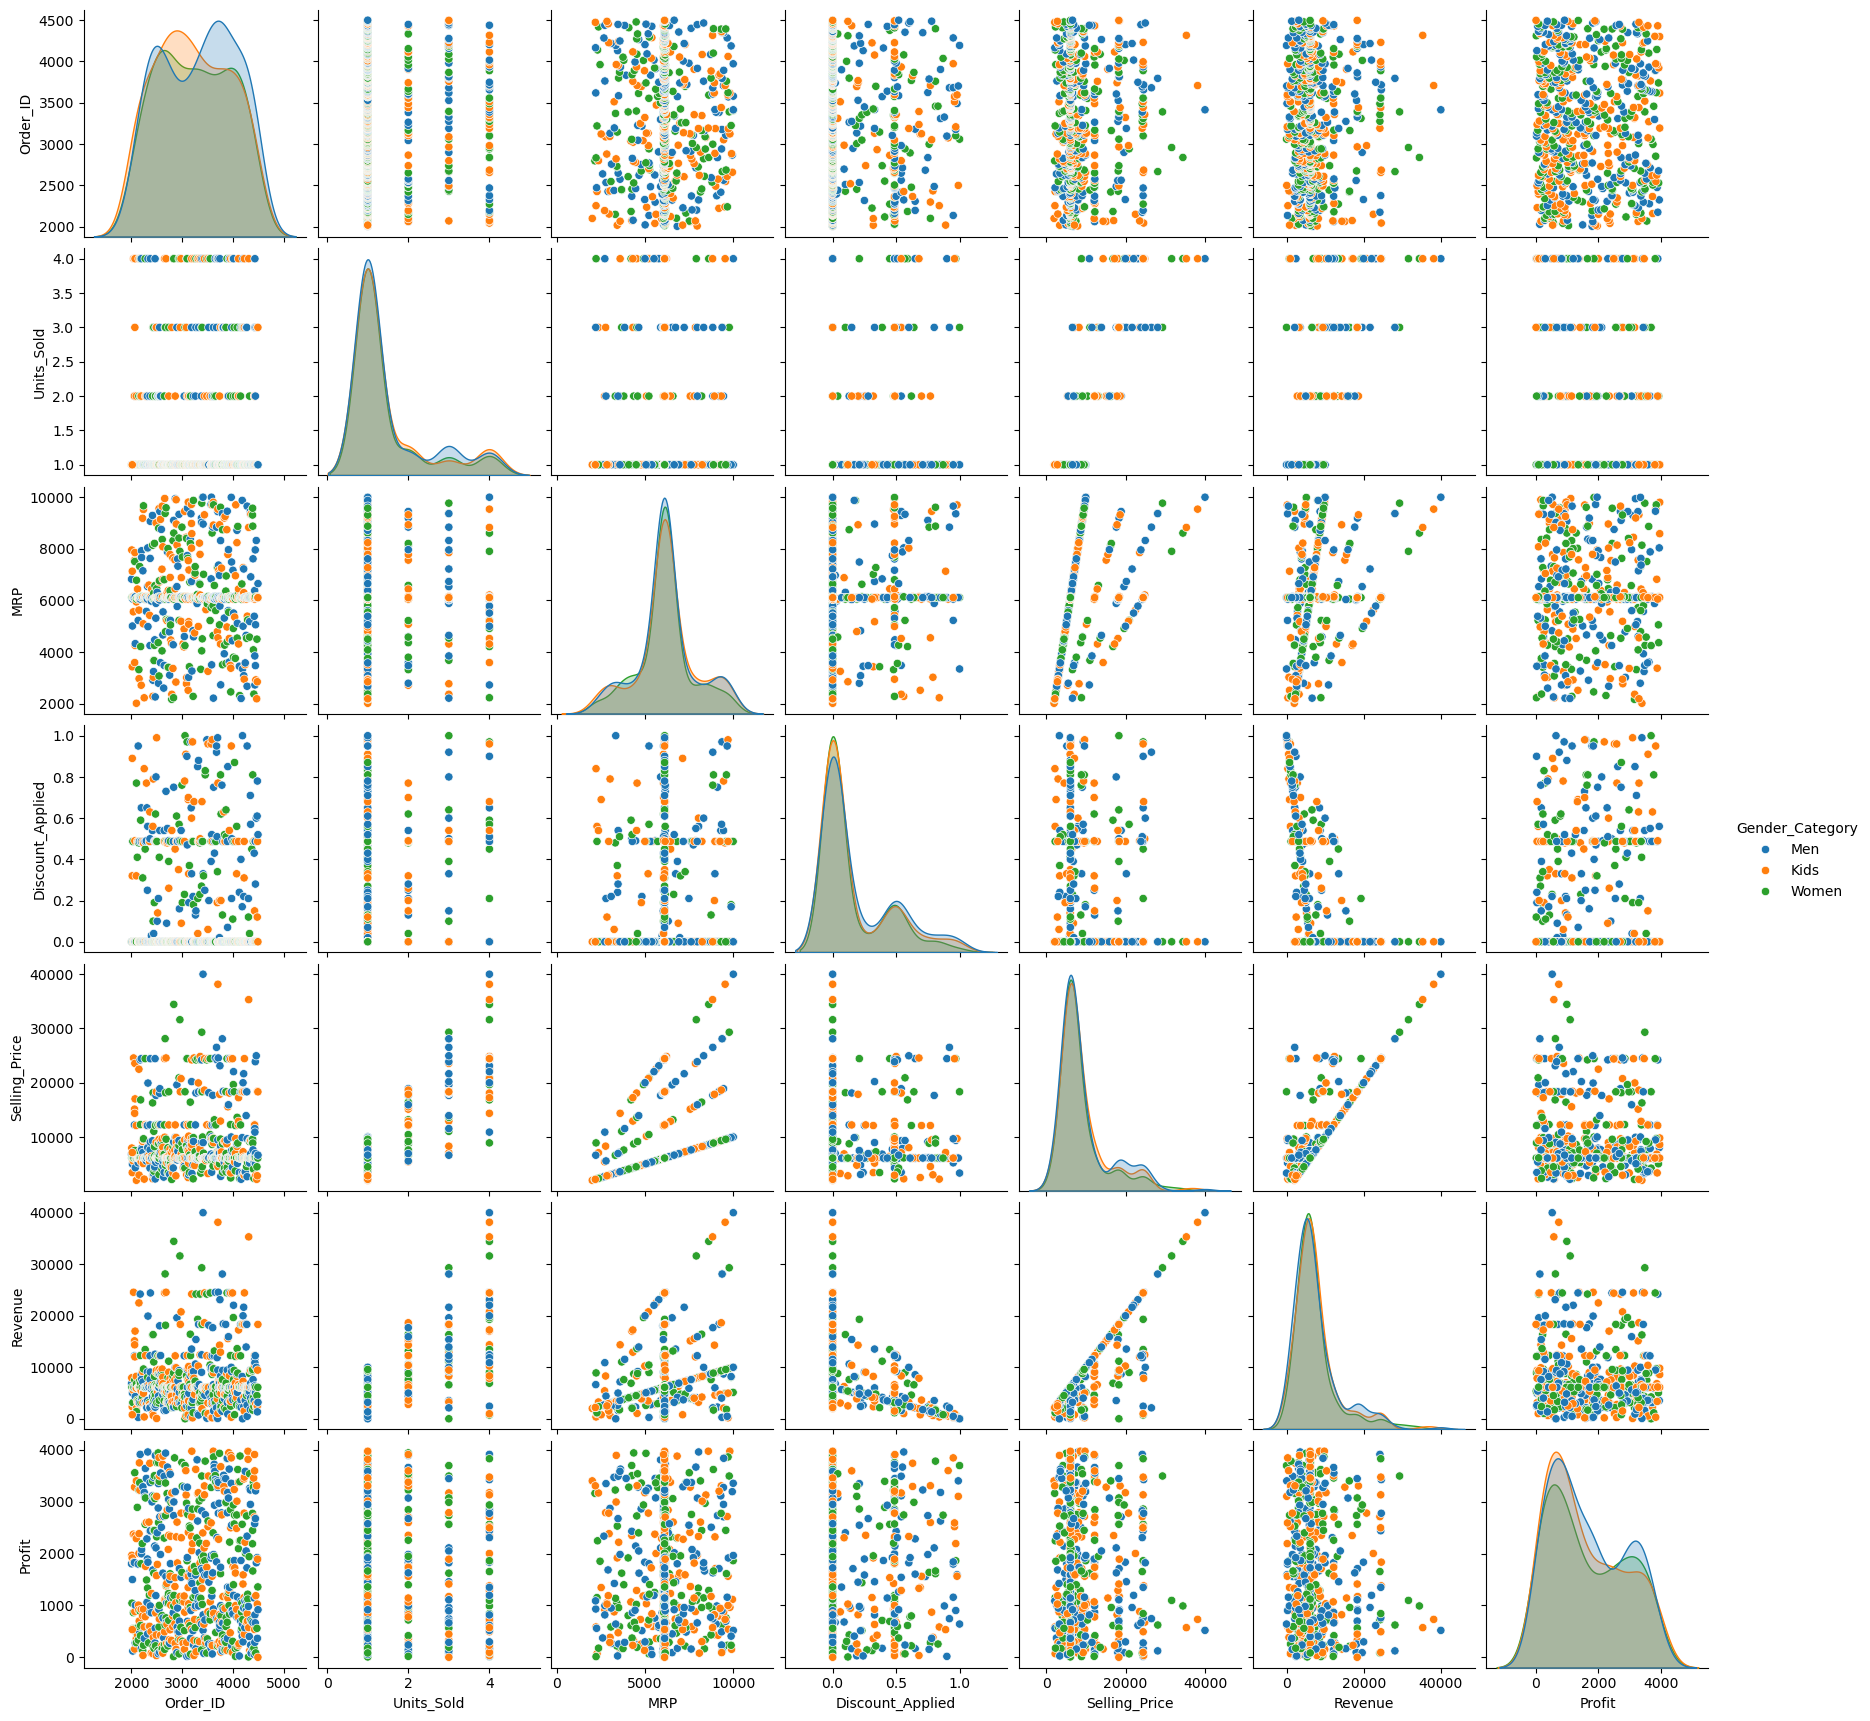

In [181]:
sns.pairplot(df1,hue= 'Gender_Category')

GOAL: ANALYSIS OF ALL NUMERICAL COLUMS  BASED ON GENDER

TYPE: MULTIVARIAT

CHART: SCATTRER PLOT

YEAR: 2025

## INSIGHTS
- This Shows Price Play Important Role in Profitability.
- Males Are Mostly engaged in purchasing products  in the year of 2025.
- Mostly Products are sold selling price with in (0 to 10000).
- when selling price increase profit also increase
- higher revanue generally results in high profit
- products whith higher MRP tend to have higher selling prices
 
 

## Analysis using pivote tables

#### >> ANALYSE HOW MUCH PROFIT EARNED BY SELLING EACH PRODUCT BASED ON  ORDER DATE FROM 2025 

In [182]:
date = df[df["Order_Date"].dt.year==2025]      ## this" dt.year" use for filter specific year ----------------------->

date.pivot_table( index="Product_Name",columns= "Order_Date",values="Profit",aggfunc=sum) 

C:\Users\sarath t.k\AppData\Local\Temp\ipykernel_9536\3707786076.py:3: FutureWarning: The provided callable <built-in function sum> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  date.pivot_table( index="Product_Name",columns= "Order_Date",values="Profit",aggfunc=sum)


Order_Date,2025-01-01,2025-01-02,2025-01-03,2025-01-04,2025-01-05,2025-01-06,2025-01-07,2025-01-08,2025-01-09,2025-01-10,...,2025-11-04,2025-11-05,2025-11-06,2025-11-07,2025-12-01,2025-12-02,2025-12-03,2025-12-05,2025-12-06,2025-12-07
Product_Name,,,,,,,,,,,,,,,,,,,,,
Air Force 1,2742.28,3364.05,NaN,NaN,NaN,419.58,NaN,NaN,938.07,NaN,...,NaN,NaN,155.59,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Air Jordan,NaN,NaN,NaN,NaN,NaN,161.85,NaN,NaN,309.79,NaN,...,NaN,NaN,NaN,945.78,NaN,NaN,NaN,NaN,NaN,NaN
Air Zoom,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Blazer Mid,NaN,NaN,NaN,NaN,NaN,1567.18,3969.15,NaN,NaN,NaN,...,2111.77,NaN,NaN,NaN,NaN,NaN,127.25,NaN,1026.86,NaN
Dunk Low,NaN,NaN,NaN,4367.32,NaN,107.83,NaN,NaN,NaN,NaN,...,NaN,1172.36,NaN,NaN,2494.96,NaN,NaN,NaN,1119.71,1033.35
Flex Trainer,NaN,NaN,NaN,39.48,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Free RN,2396.55,NaN,NaN,NaN,2776.82,NaN,3885.97,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,3067.47,NaN,NaN,NaN
Kyrie Flytrap,NaN,5574.37,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LeBron 20,NaN,NaN,3525.96,NaN,NaN,NaN,NaN,469.61,NaN,NaN,...,NaN,NaN,NaN,2427.86,NaN,NaN,NaN,1116.54,NaN,NaN


#### ANALYSE HOW MUCH PROFIT EARNED in 2025 BY  PRODUCTS BASED ON Size


In [183]:
date = df[df['Order_Date'].dt.year==2025]

date.pivot_table(index='Product_Name',columns=["Size"],values='Profit',aggfunc=sum)

C:\Users\sarath t.k\AppData\Local\Temp\ipykernel_9536\1075448666.py:3: FutureWarning: The provided callable <built-in function sum> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  date.pivot_table(index='Product_Name',columns=["Size"],values='Profit',aggfunc=sum)


Size,L,M,S,XL,nan
Product_Name,,,,,
Air Force 1,21478.72,15951.69,4235.23,2565.28,8464.76
Air Jordan,9330.70,7902.71,1735.58,26751.76,5121.96
Air Zoom,14116.49,8012.32,2673.14,17967.71,5805.90
Blazer Mid,14826.56,8418.57,NaN,14806.95,12835.97
Dunk Low,4310.69,14705.26,3865.61,18880.12,6046.13
Flex Trainer,5534.74,12083.87,3126.66,24294.75,5463.18
Free RN,25895.01,15258.99,3164.25,16024.21,12280.44
Kyrie Flytrap,18203.03,5956.22,1708.88,9264.30,6754.33
LeBron 20,11001.04,11550.22,8355.18,14806.93,16849.63


#### ANALYSE UNITS SOLD ON JANUVARY IN 2025

In [184]:
dm=df[(df['Order_Date'].dt.month==1) & (df["Order_Date"].dt.year==2025)]

dm.pivot_table( index="Order_Date",columns= "Product_Name",values="Units_Sold",aggfunc=sum)

C:\Users\sarath t.k\AppData\Local\Temp\ipykernel_9536\3447036288.py:3: FutureWarning: The provided callable <built-in function sum> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  dm.pivot_table( index="Order_Date",columns= "Product_Name",values="Units_Sold",aggfunc=sum)


Product_Name,Air Force 1,Air Jordan,Air Zoom,Blazer Mid,Dunk Low,Flex Trainer,Free RN,Kyrie Flytrap,LeBron 20,Mercurial Superfly,Metcon 7,Pegasus Turbo,Phantom GT,Premier III,React Infinity,SuperRep Go,Tiempo Legend,Waffle One,Zoom Freak,ZoomX Invincible
Order_Date,,,,,,,,,,,,,,,,,,,,
2025-01-01,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
2025-01-02,1.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2025-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,1.0,NaN,2.0
2025-01-04,NaN,NaN,NaN,NaN,2.0,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2025-01-05,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN
2025-01-06,2.0,1.0,NaN,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0
2025-01-07,NaN,NaN,NaN,1.0,NaN,NaN,2.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2025-01-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
2025-01-09,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### ANALYSE UNIT PURCHASED FROM EACH REGION BY GENDER WISE FOR EACH PRODUCT BY DATE IN 2025

In [185]:
date= df[df['Order_Date'].dt.year==2025]

date.pivot_table( index="Region",columns=['Gender_Category' ,'Product_Line'],values='Units_Sold',aggfunc=sum)

C:\Users\sarath t.k\AppData\Local\Temp\ipykernel_9536\2749191221.py:3: FutureWarning: The provided callable <built-in function sum> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  date.pivot_table( index="Region",columns=['Gender_Category' ,'Product_Line'],values='Units_Sold',aggfunc=sum)


Gender_Category       Kids                                          Men  \
Product_Line    Basketball Lifestyle Running Soccer Training Basketball   
Region                                                                    
Bangalore             18.0      11.0     6.0   18.0     16.0       12.0   
Delhi                  6.0       9.0    16.0    8.0      8.0       12.0   
Hyderabad              4.0      24.0     8.0    7.0      3.0       10.0   
Kolkata               11.0      13.0     8.0    8.0      7.0        9.0   
Mumbai                 8.0      12.0     4.0    8.0      9.0       20.0   
Pune                  15.0      13.0    13.0   12.0     12.0        6.0   

Gender_Category                                        Women            \
Product_Line    Lifestyle Running Soccer Training Basketball Lifestyle   
Region                                                                   
Bangalore            14.0     9.0   18.0     14.0        5.0       7.0   
Delhi                 6.0    15.0    9.0      6.0        6.0      12.0   
Hyderabad            11.0     8.0   10.0     13.0        8.0       5.0   
Kolkata              11.0     8.0    8.0      5.0       12.0       3.0   
Mumbai               18.0     7.0   13.0     11.0       13.0      15.0   
Pune                  6.0     5.0   11.0     28.0        7.0       6.0   

Gender_Category                          
Product_Line    Running Soccer Training  
Region                                   
Bangalore          12.0    7.0     12.0  
Delhi              16.0    3.0      9.0  
Hyderabad           6.0   10.0     12.0  
Kolkata            11.0    8.0     16.0  
Mumbai              9.0    6.0      8.0  
Pune               12.0   13.0     14.0

In [186]:
## correlation Analisis

corr = df1[['MRP','Profit']].corr()
corr

,MRP,Profit
MRP,1.000000,0.018688
Profit,0.018688,1.000000


## 🔹 Bivariate Analysis

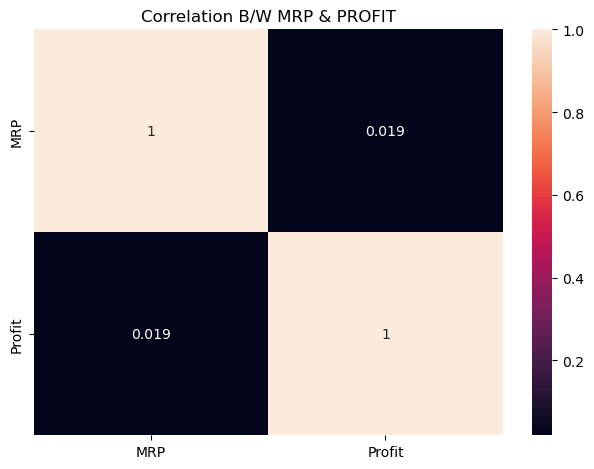

In [187]:
sns.heatmap(corr,annot=True)
plt.title('Correlation B/W MRP & PROFIT')                                                    
plt.tight_layout()                              
plt.show()   

GOAL: FIND POSITIVE OR NEGATIVE CORRELATION B/W 

TYPE: HEAT MAP

CHART: HEAT MAP

YEAR: 2025

## INSIGHTS
- The Heatmap Shows the Correlation Value b/w MRP & Profit is O.O19 ( POSITIVE  Correlation), Its Very Close to 0.
- It Means MRP Is NOT STRONGLY Effecting Profit, So Profit May Increased By Others Factors
  


In [188]:
crr1= df[['Discount_Applied','Profit']].corr()
crr1


,Discount_Applied,Profit
Discount_Applied,1.000000,0.025868
Profit,0.025868,1.000000


## 🔹 Bivariate Analysis

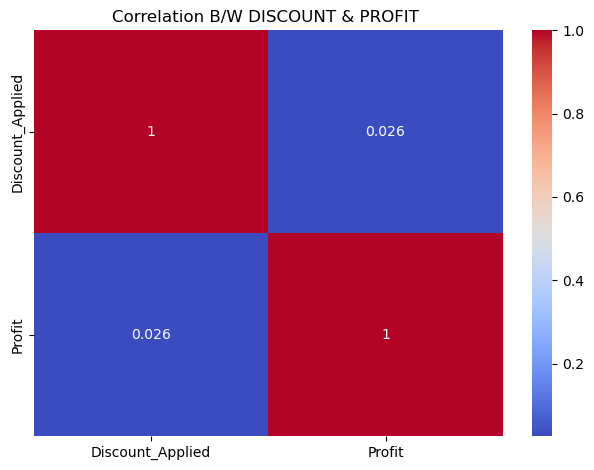

In [189]:
sns.heatmap(crr1,annot=True,cmap='coolwarm')
plt.title('Correlation B/W DISCOUNT & PROFIT ')                                                    
plt.tight_layout()                              
plt.show()            

GOAL: CORRELATION B/W DISCOUNT & PROFIT

TYPE: HEAT MAP

CHART: HEAT MAP

YEAR: 2023 TO 2025

## INSIGHTS
- The Heatmap Shows the Correlation B/W Discount & Profit is +0.026( Positive Correlation)
- its less close to 1 
- it means it also not effect profit,so profit may effected by some others factors, eg 'unit_sold',selling_price, etc.


GOAL: FIND WHICH PRODUCT_LINE AND WHCH PRODUCT_NAME IS BEST PROPOTION BASED ON PROFIT.

TYPE: UNIVERIATE

CHART: PIE CHART

YEAR: 2023 - 2025

### Pie chart

## 🔹 Multivariate Analysis

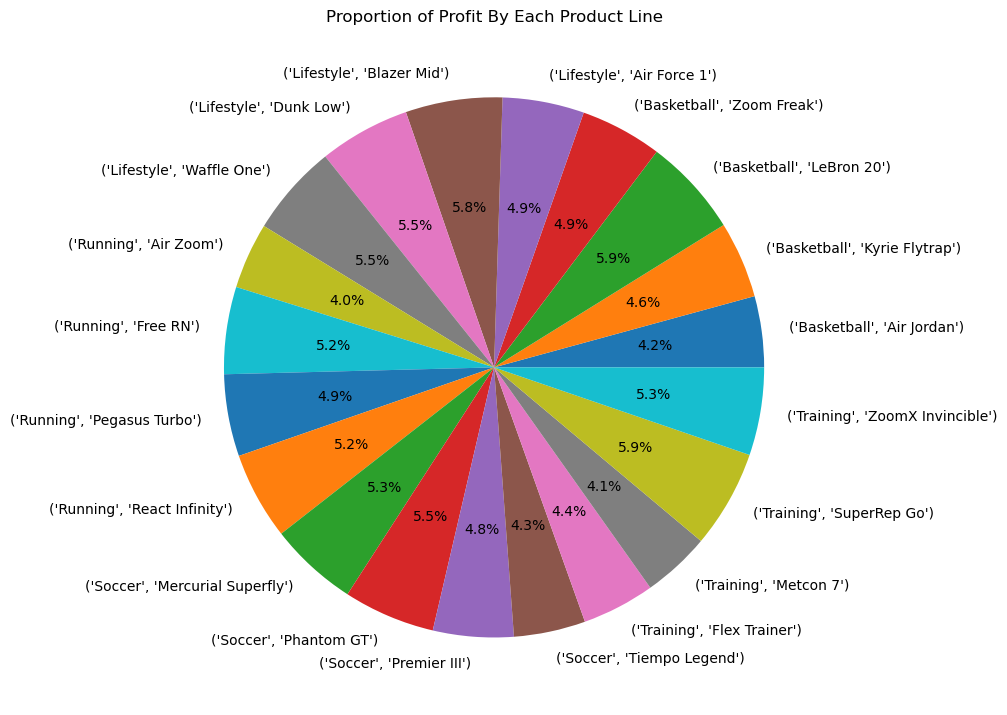

In [207]:
grp_product = df.groupby(['Product_Line', 'Product_Name'])['Profit'].sum()

plt.figure(figsize=(10,10))
plt.pie(grp_product, labels=grp_product.index, autopct='%1.1f%%')
plt.title('Proportion of Profit By Each Product Line')
plt.tight_layout()
plt.show()


GOAL : FIND PRODUCT PROPORTION 

TYPE : Multivariate

CHART: PIE CHART

YEAR : 2024 TO 2025


## INSIGHTS 
- THE BUSINESS NOT DEPEND ON ONE PRODUCT
- TOP PERFORMERS IN EACH PRODUCT_LINE {'TRAINING':Metcon 7(5.9%),'SOCCER': mercurial SuperFly(5.8%),'LIFESTYLE': Air Force1(5.9%),'BASKETBALL': Lebron 20(5.9%)
- LOWEST PROFIT CONTRIBUTORS (4.0 TO 4.5% CATEGORIES SUCH AS) : "RUNNING": Free RN, "RUNNING":Air Zoom, "LIFESTYLE": Waffle One

### Box Plot

## 🔹 Bivariate Analysis

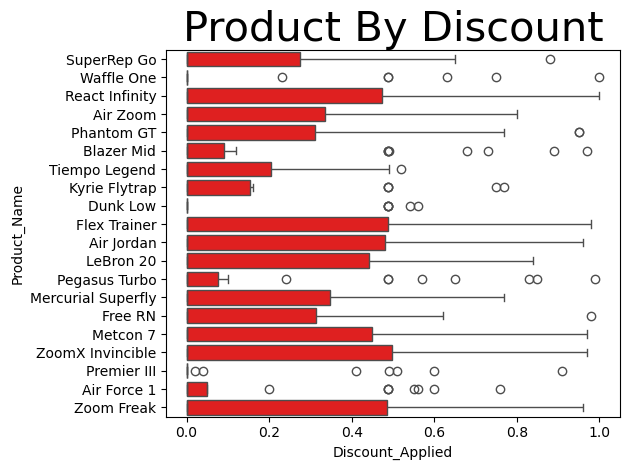

In [191]:
sns.boxplot(x='Discount_Applied',y='Product_Name',data=df1,color='r')
plt.title("Product By Discount",size=30)                                                   
plt.tight_layout()                              
plt.show()   

GOAL: ANALYSE AND FIND DISCOUNT OF EACH PRODUCT AND THEIR OUTLAYERS.

TYPE: BIVARIATE

CHART: BOX PLOT

YEAR: 2025

## INSIGHTS
- HORIZONTAL BOX PLOT FOR MORE CLARIFICATION OF PRODUCT NAME
- WAFFLE ONE  & PREMIER & DUNK LOW , PRODUCT HAVE HIGHEST OUTLAYERS
- STANDERISED DISCOUNT RATE ARE FOLLOWED SOME PRODUCT SUCH AS :" React Infinity, Flex Trainner, Air Jordan, Metcon 7, ZoomX Invincible, Zoom Freak"
- SOME PRODUCTS RECEIVE HIGHER DISCOUNTS, WHILE OTHER RECEIVE VERY LOW OR ALMOST ZERO DISCOUNT
- NIKE USES PRODUCT-SPECIFIC DISCOUNT STRATEGIES
- POPULAR OR HIGH-DEMAND PRODUCTS MAY GET LOW DISCOUNTS
- SLOW MOVING PRODUCTS MAY GET HIGHER DISCOUNT

In [192]:
df

,Order_ID,Gender_Category,Product_Line,Product_Name,Size,Units_Sold,MRP,Discount_Applied,Selling_Price,Order_Date,Revenue,Sales_Channel,Region,Profit,Order_Month
0,2000,Kids,Training,SuperRep Go,M,1.0,6106.0,0.47,6106.0,2024-03-09,3236.18,Online,Bangalore,770.45,2024-03
1,2001,Women,Soccer,Tiempo Legend,M,3.0,4958.0,0.00,14874.0,2024-07-09,14874.00,Retail,Hyderabad,112.53,2024-07
3,2003,Kids,Lifestyle,Blazer Mid,L,1.0,9674.0,0.00,9674.0,2024-04-10,9674.00,Online,Pune,3376.85,2024-04
4,2004,Kids,Running,React Infinity,XL,1.0,6107.0,0.00,6107.0,2024-09-12,6107.00,Retail,Delhi,187.89,2024-09
6,2006,Men,Training,SuperRep Go,M,1.0,6820.0,0.00,6820.0,2025-04-06,6820.00,Online,Bangalore,1802.09,2025-04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2105,4493,Women,Lifestyle,Blazer Mid,XL,4.0,6137.0,0.00,24548.0,2024-10-04,24548.00,Online,Mumbai,321.24,2024-10
2106,4494,Women,Training,ZoomX Invincible,L,1.0,6106.0,0.00,6106.0,2025-12-02,6106.00,Online,Kolkata,1357.29,2025-12
2107,4495,Kids,Basketball,Kyrie Flytrap,XL,3.0,6103.0,0.00,18309.0,2025-05-14,18309.00,Online,Pune,2.97,2025-05
2109,4497,Men,Soccer,Tiempo Legend,S,1.0,6648.0,0.52,6648.0,2025-02-07,3191.04,Retail,Bangalore,918.14,2025-02


## Bar Plot

## 🔹 Bivariate Analysis

In [193]:
region_sales= df1.groupby('Region') ['Units_Sold'].sum().sort_values(ascending=False)

C:\Users\sarath t.k\AppData\Local\Temp\ipykernel_9536\2040990888.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_sales.values,y= region_sales.index,palette='Greens_r')


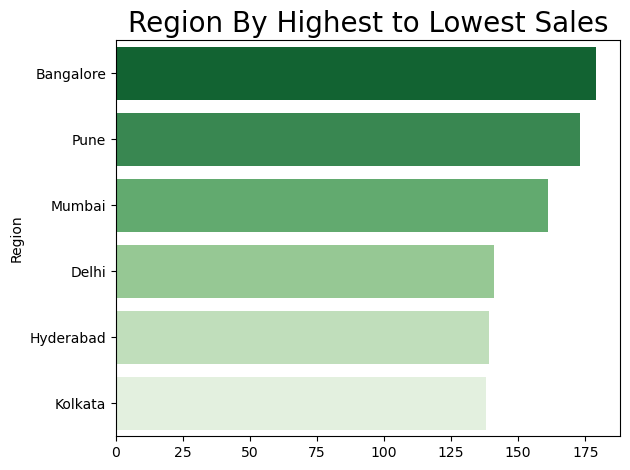

In [194]:
sns.barplot(x=region_sales.values,y= region_sales.index,palette='Greens_r') 
plt. title("Region By Highest to Lowest Sales",size=20)                                                   
plt.tight_layout()                              
plt.show()   

GOAL: FIND WHICH REGION HAVE MORE PURCHASING ABILITIES

TYPE: BIVARIATE

CHART: HORIZONTAL BAR CHART

YEAR: 2025

## INSIGHTS

- MOST SALES ARE OCCURED IN BABGALORE & PUNE REGION 'GREATER THAN 8LAKH'
- IT INDICATES STRONG DEMAND ,GOOD STORE PERFORMANCE, & HIGHT COUSTMERS PURCHASING POWER
-  MUMBAI SHOW SAME BUT MUMBAI SLIGHTLY LOWERTHAN PUNE.
- LAST THREE REGION DELHI ,KOLKATA,HYDERABAD SHOW APPROXIMATELY SAME, BUT DELHI HAVE SLIGHTLY HIGHER THAN KOLKATA & HYDERABAD

### Sub Plot

## 🔹 Bivariate Analysis

C:\Users\sarath t.k\AppData\Local\Temp\ipykernel_9536\1104905934.py:8: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x='Order_Date', y='Revenue', palette='R',


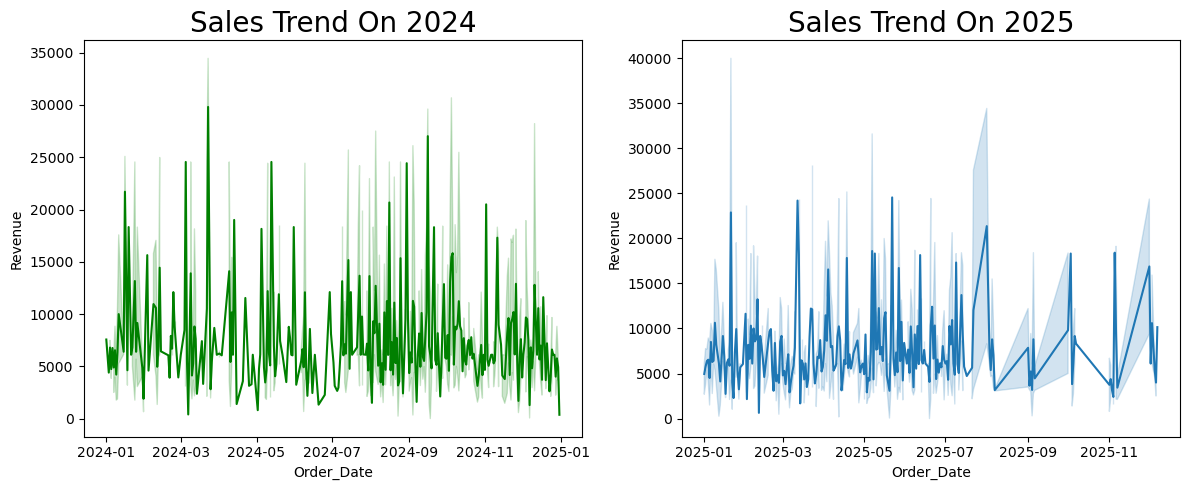

In [195]:
df2 = df[df['Order_Date'].dt.year == 2024]

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.lineplot(x='Order_Date', y='Revenue', color='g',
             data=df2, ax=axes[0])

sns.lineplot(x='Order_Date', y='Revenue', palette='R',
             data=df1, ax=axes[1])

axes[0].set_title("Sales Trend On 2024",size=20) 
axes[1].set_title('Sales Trend On 2025',size= 20)
plt.tight_layout()
plt.show()


GOAL: FIND WHICH YEAR GET MORE SALES BY COMPARING EACH MONTHS

TYPE: BIVARIATE

CHART: SUB PLOT

YEAR: 2024 & 2025

## INSIGHTS
- REVANUE GENERATED IN THE YEAR OF 2024 THAN 2025.
- IN 2025 & 2024 REVANUE CALCULATED BY ONE MONTH GAP.
- IN 2025 HIGHEST REVANUE EARNED IN 2025-03 & 2025-05, & IN 2024 HIGHEST REVENUE EARNED IN SAME AS 2025 BUT 2024-O3 OCCURED MORE
SALES COMPARED TO 2025-03.
- FROM 2025-07 REVANUE UPWARD MODERATE LEVEL COMPIRED TO OTHER MONTHS.
- IN 2024 SALES GO UPWARD FASTLY AND THEN GO TO DOWNWARD SAMEWAY, BUT IN 2025 SALE GO UPWARD AT MODERATE LEVEL AND ITS STABLED FEW DAY BEFORE DOWNWARD

In [196]:
df

,Order_ID,Gender_Category,Product_Line,Product_Name,Size,Units_Sold,MRP,Discount_Applied,Selling_Price,Order_Date,Revenue,Sales_Channel,Region,Profit,Order_Month
0,2000,Kids,Training,SuperRep Go,M,1.0,6106.0,0.47,6106.0,2024-03-09,3236.18,Online,Bangalore,770.45,2024-03
1,2001,Women,Soccer,Tiempo Legend,M,3.0,4958.0,0.00,14874.0,2024-07-09,14874.00,Retail,Hyderabad,112.53,2024-07
3,2003,Kids,Lifestyle,Blazer Mid,L,1.0,9674.0,0.00,9674.0,2024-04-10,9674.00,Online,Pune,3376.85,2024-04
4,2004,Kids,Running,React Infinity,XL,1.0,6107.0,0.00,6107.0,2024-09-12,6107.00,Retail,Delhi,187.89,2024-09
6,2006,Men,Training,SuperRep Go,M,1.0,6820.0,0.00,6820.0,2025-04-06,6820.00,Online,Bangalore,1802.09,2025-04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2105,4493,Women,Lifestyle,Blazer Mid,XL,4.0,6137.0,0.00,24548.0,2024-10-04,24548.00,Online,Mumbai,321.24,2024-10
2106,4494,Women,Training,ZoomX Invincible,L,1.0,6106.0,0.00,6106.0,2025-12-02,6106.00,Online,Kolkata,1357.29,2025-12
2107,4495,Kids,Basketball,Kyrie Flytrap,XL,3.0,6103.0,0.00,18309.0,2025-05-14,18309.00,Online,Pune,2.97,2025-05
2109,4497,Men,Soccer,Tiempo Legend,S,1.0,6648.0,0.52,6648.0,2025-02-07,3191.04,Retail,Bangalore,918.14,2025-02


### Scatter Plot

## 🔹  Bivariate Analysis

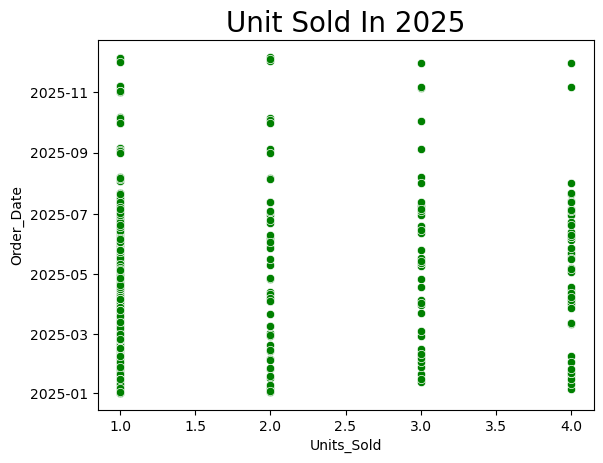

In [197]:
sns.scatterplot(x='Units_Sold',y='Order_Date',data=df1,color='g')
plt.title('Unit Sold In 2025',size=20)
plt.tight_layout
plt.show()

GOAL: ANALYSE AND FIND WHICH MONTH SOLD MORE UNITS IN 2025

TYPE:BIVARIATE

CHART: SCATTER PLOT

YEAR: 2025

## INSIGHTS
- IN THIS CUSTOMERS ARE DIVIDED IN TO SOME CATEGORIES LINE 'RICH', 'LINE','POOR'.
- IN 2025 MOSTLY POOR OR LINE COUSTMERS ARE ENGAGED FOR PURCHASING 1 TO 2 UNIT FROM JANUARY TO SEPTEMBER.
- FROM 3 TO 4 UNITS ARE PURCHASED BY THE MIDDLE LEVEL INCOME OR HIGH LEVEL INCOME CUSTOMERS,BUT FROM JANUARY PURCHASING POWER OF CUSTOMERS IS HIGH BUT THEN THE PURCHASING POWER IS SLOWLY DECREASING.
  

### Bar Plot

## 🔹 Bivariate Analysis

Product_Name
Flex Trainer    359931.0
LeBron 20       344592.0
SuperRep Go     340051.0
Blazer Mid      337328.0
Air Force 1     313726.0
Name: Selling_Price, dtype: float64


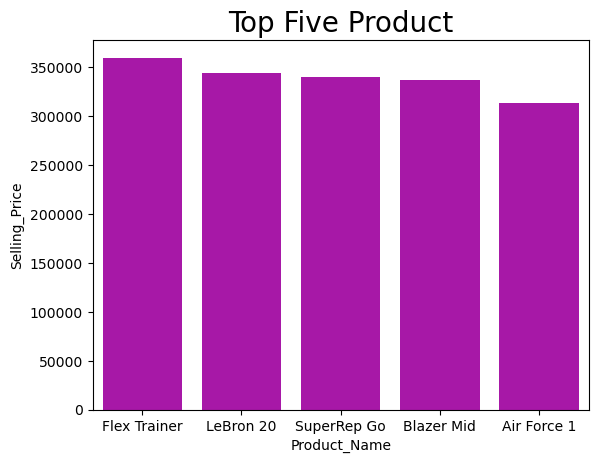

<Figure size 1500x500 with 0 Axes>

In [198]:
grp =df1.groupby('Product_Name')['Selling_Price'].sum().sort_values(ascending=False).head(5)
print(grp)
print('=============================')
sns.barplot(x=grp.index,y=grp.values,color='m')
plt.title('Top Five Product',size=20)
plt.xlabel('Product_Name')
plt.ylabel('Selling_Price')
plt.tight_layout
plt.figure(figsize=(15,5))  
plt.show()

GOAL: FIND THE TOP TEN PRODUCTS BASED ON PROFIT

TYPE: BIVARIATE

CHART: BAR PLOT

YEAR: 2025

## INSIGHTS
- Highest Product By Profit Is Free RN.
- It Means High demanded Product is Free RN.

 ## Violin Plot

## 🔹  Bivariate Analysis

<Figure size 3000x500 with 0 Axes>

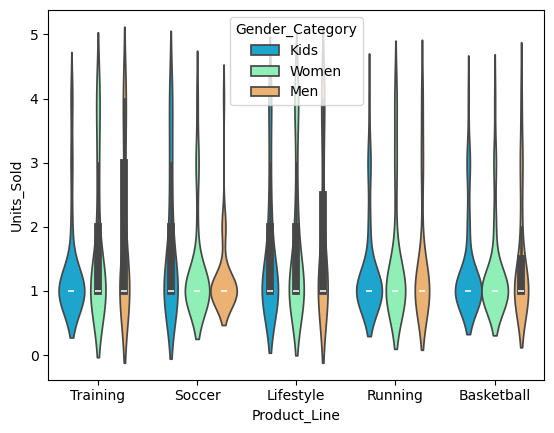

<Figure size 3000x500 with 0 Axes>

In [199]:
sns.violinplot(x='Product_Line',y='Units_Sold',data=df2,palette='rainbow',hue="Gender_Category")
plt.figure(figsize=(30,5))

GOAL:FIND A BEST PRODUCT_LINE BASED ON UNITS SOLD USING VIOLINPLOT

TYPE: BIVARIATE

CHART:VIOLINPLOT

YEAR: 2025

## INSIGHTS
- THE VIOLIN FOR RUNNING AND SOCCER STRECTCH HIGHER ON THS Y-AXIS
- MOST PEOPLES ARE DEMANDED FOR SOCCER AND RUNNING BRAND
- LIFESTYLE HAVE LARGE PROFIT PROPOSTION ,BUT UNITS SOLD COMPARETIVLY LOW FROM OTHER  PRODUCT_LINE



 ## Scatter Plot

## 🔹 Bivariate Analysis

Text(0.5, 1.0, ' SALES OF PRODUCT')

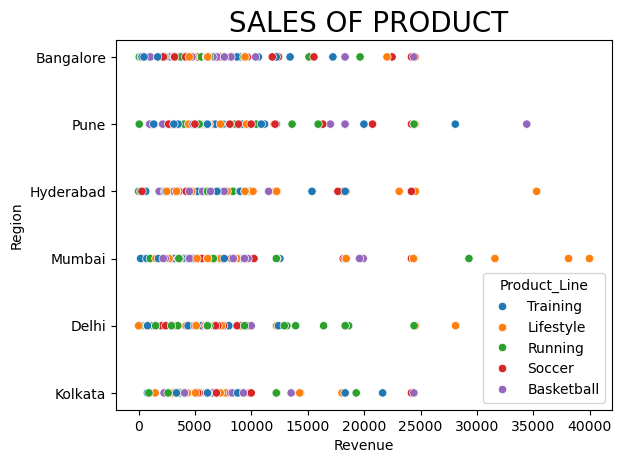

In [200]:
sns.scatterplot(x='Revenue', y='Region',hue= 'Product_Line',data=df1)
plt.title(" SALES OF PRODUCT",size=20)

## INSIGHTS
- LIFESTYLE IS THE MOST HIGH VALUE DEMANDED PRODUCT_LINE
- ALL TYPE OF PRODUCTS ARE PURCHASE BY CUSTOMERS IN BANGALORE AND PUNE 

GOAL: FIND WHICH TYPES OF PRODUCT PURCHASED IN EACH REGION

TYPE: BIVEREATE

CHART:SCATTER PLOT

YEAR:2025

### Joint Plot

## 🔹 Bivariate Analysis

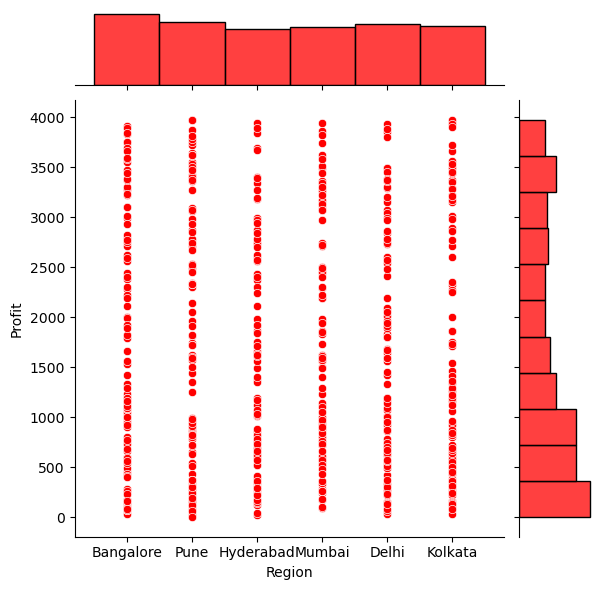

In [201]:
sns.jointplot(x='Region',y='Profit',data=df1,kind= 'scatter',color='r')
plt.tight_layout
plt.show()

## INSIGHTS
- IN REGIONAL WISE MOST PROFIT EARNED FROM BANGALORE
- IN PROFIT WISE HIGH PROFIT EARNED B/W 0 TO 500
- IN BANGALORE AND PUNE CUSTOMERS HAVE DEAMAND AND PURCHASING ABILITY 

GOAL:ANALYSE THE PROFIT EARNED IN REGIONAL WISE AND PROFIT WISE

TYPE:BIVARIETE

CHART: JOINT PLOT "SCATTER"

YEAR: 2025


### Joint Plot

## 🔹 Bivariate Analysis

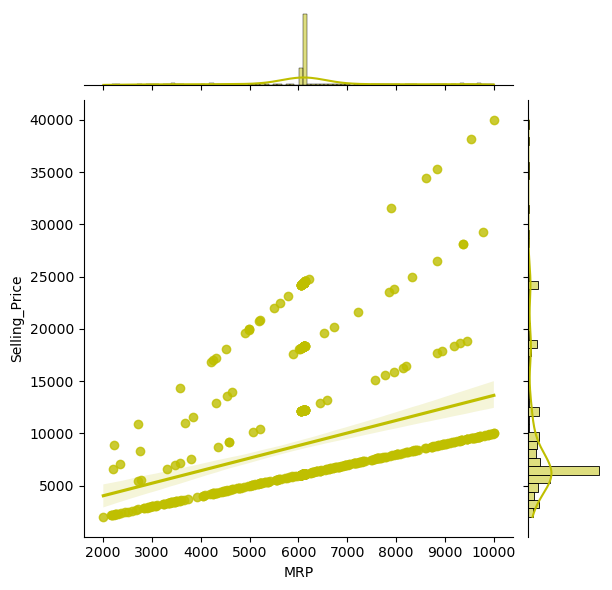

In [202]:
sns.jointplot(x='MRP',y='Selling_Price',data=df1,kind='reg',color="y")
plt.tight_layout
plt.show()

## INSIGHTS
- MRP INCREASES SELLING PRICE ALSO INCREASES.
- SELLING PRICE INCREASED BASED ON UNIT SOLD.
- HIGHER PRICED PRODUCT ARE ALSO SOLD AT HIGHER PRICE.
- THERE IS LOT OF OUTLAYERS ,BEACAUSE UNITS INCREASES SELLING PRICE ALSO INCREASES

GOAL: ANALYSE SELLING PRICE CHANGES BASED ON MRP 

TYPE : BIVERIATE

CHART: JOINT PLOT "reg"

YEAR: 2025

## Bar Plot

## 🔹Bivariate Analysis

<Figure size 1500x1000 with 0 Axes>

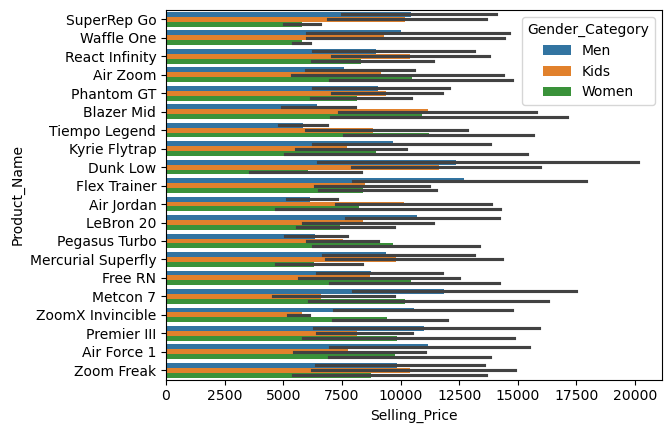

<Figure size 1500x1000 with 0 Axes>

In [203]:

sns.barplot(x='Selling_Price',y='Product_Name',hue='Gender_Category',data=df1)
plt.figure(figsize=(15,10))

## INSIGHTS
- IN EACH PRODUCT MEN HAVE MORE PURCHASING POWER 
- IN MEN DUNK LOW IS THE MOST DEMANDED PRODUCT
- IN WOMENS WISE DUNK LOW HAVE HIGH DEMAND & ALSO BLAZER MID ,AIR ZOOM HAVE SAME WAY


GOAL: FIND WHO HAVE MORE PURCHASING POWER BASED ON PRODUCT & SELLING PRICE

TYPE: BIVERIATE

CHART: BAR CHART

YEAR:2025

### CONVERT CLAENED DATASET INTO CSV FILE


In [204]:
df.to_csv('NIKE_DATE_SET',index=False)

# <==🔍 KEY FINDINGS==>

**Sales Channels;**
- Most of The Buying & Selling  are Through Traditional or Retail way


**Products**
- Pegasus Turbo & Free RN  is The most Leading product based on profit
- Flex Trainer & LeBorn 20 is The Best Product Based on Selling Price

**Product_Line**
- Running and Lifestyle is The Most Leading and Demanding Prodct_Line Based on Profit


**Order_Month**
- Profit Peaked in 2024/april to 2025/october


**Size of FootWare**
- Most of The FootWare are Sold on Size are 'XL'.


**MRP & Selling Price & Units Sold**
- Coustmers Have a High Purchasing Power , Because The Selling Price Increased Based On No of Units Purchased
- In Bangalore have The Higher Purchasing Ability Based On Units_Soldmin 2025


# 💡 RECOMMENDATION

**Discount Based Recommendation**
1) Apply or Standardize Discount Based on Category Footware & Apparel (eg;Footware:20%, Apparel:30% )

2) Apply Dynamic Discount Based On Demand

3) Apply Discount Based on Period(eg.Apply High Discount in low Demand Period & Apply Low Discount in High Demand Period)

**Online_Channel Based Recommendation**

1) Improve On_Time Delivary

2) Apply Propper Discount on Festival days

3) Provide Offers To Low Demanded Products (eg; Buy one Get_One free)

4) Provide Regular Ads For Low Demanded Product Through Social Media


**Regional wise Recommendation**

1) Product Recommendation for Customers Based on Their Purchasing Ability & Region (eg; Bangalore & Pune Have  High Ability for Purchasing Products so
Recommend to Them High Priced Product)

**Product Based Recommendation**

1) Improve The Stock of Flex Trainer & Le Born 20
2) Apply The Uniform Discount Rate for Those Product
3) Made a Product Development on UN-Demanded Products
4) Improve Women Type Products Based on Thier Purchasing Power
   
 


NameError: name 'df' is not defined